# Medicare fraud segmenting using K-means clustering

In [0]:
# Data processing
from pyspark.sql.functions import log, col, exp

# Modeling
from pyspark.ml.feature import VectorAssembler


In [0]:
write_path = 'dbfs:/tmp/reproducible_ml_uofl/medicare_fraud_class4.delta'
medicare_fraud_df = spark.read.format('delta').load(write_path)

#Show basic summary stats
display(medicare_fraud_df)

BeneID,Age,MbrMonthsPartA,MbrMonthsPartB,Gend_M,RenalDis_Falg,Alzheimer_Flag,HeartFail_Flag,kidneydis_Flag,cancer_Flag,obstrpulmonary_Flag,depression_Flag,diabetes_Flag,Ischemicheart_Flag,Osteo_Flag,rheumatoidarthritis_Flag,stroke_Flag,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Trgt_Fraud
BENE102690,86,12,12,1,1,0,1,1,0,1,1,1,1,0,1,0,143800,4272,42000,1068,0
BENE152088,102,12,12,1,1,1,1,1,1,1,1,1,1,0,1,1,111710,4272,4000,1068,0
BENE36012,75,12,12,0,0,0,1,1,0,0,1,1,1,0,0,1,36000,1068,36000,1068,0
BENE38773,77,12,12,0,0,0,0,1,0,0,0,0,0,0,0,0,95000,2136,12000,1068,0
BENE98831,81,12,12,1,0,1,1,0,0,0,1,1,1,0,1,0,3000,1068,3000,1068,0
BENE16277,89,12,12,1,0,1,1,0,0,0,0,1,1,0,0,1,6120,1068,6000,1068,0
BENE99552,85,12,12,1,0,0,1,0,0,0,1,1,1,0,1,1,16010,3204,3000,1068,0
BENE98446,79,12,12,0,1,1,1,1,0,0,1,1,1,0,0,0,13000,2136,10000,1068,0
BENE123836,79,12,12,0,0,0,0,0,1,0,0,1,1,0,0,0,4000,1068,4000,1068,0
BENE139063,35,12,12,1,0,1,0,1,0,1,0,0,1,0,0,0,33500,2136,21000,1068,0


In [0]:
# Train test split
trainDF, testDF = medicare_fraud_df.randomSplit([.65, .35], seed=42)
# Print the number of records
print(f'There are {trainDF.cache().count()} records in the training dataset.')
print(f'There are {testDF.cache().count()} records in the testing dataset.')

There are 17800 records in the training dataset.
There are 9391 records in the testing dataset.

In [0]:
from pyspark.sql.functions import *
col_null_cnt_df =  trainDF.select([count(when(col(c).isNull(),c)).alias(c) for c in trainDF.columns])
display(col_null_cnt_df)

BeneID,Age,MbrMonthsPartA,MbrMonthsPartB,Gend_M,RenalDis_Falg,Alzheimer_Flag,HeartFail_Flag,kidneydis_Flag,cancer_Flag,obstrpulmonary_Flag,depression_Flag,diabetes_Flag,Ischemicheart_Flag,Osteo_Flag,rheumatoidarthritis_Flag,stroke_Flag,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Trgt_Fraud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,413,0


In [0]:
trainDF2 = trainDF.na.fill(value=0)

col_null_cnt_df2 =  trainDF2.select([count(when(col(c).isNull(),c)).alias(c) for c in trainDF2.columns])
display(col_null_cnt_df2)

BeneID,Age,MbrMonthsPartA,MbrMonthsPartB,Gend_M,RenalDis_Falg,Alzheimer_Flag,HeartFail_Flag,kidneydis_Flag,cancer_Flag,obstrpulmonary_Flag,depression_Flag,diabetes_Flag,Ischemicheart_Flag,Osteo_Flag,rheumatoidarthritis_Flag,stroke_Flag,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Trgt_Fraud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
print(trainDF2.columns)

['BeneID', 'Age', 'MbrMonthsPartA', 'MbrMonthsPartB', 'Gend_M', 'RenalDis_Falg', 'Alzheimer_Flag', 'HeartFail_Flag', 'kidneydis_Flag', 'cancer_Flag', 'obstrpulmonary_Flag', 'depression_Flag', 'diabetes_Flag', 'Ischemicheart_Flag', 'Osteo_Flag', 'rheumatoidarthritis_Flag', 'stroke_Flag', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Trgt_Fraud']

In [0]:
# Linear regression expect a vector input
vecAssembler = VectorAssembler(inputCols=['Age', 'MbrMonthsPartA', 'MbrMonthsPartB', 'Gend_M', 'RenalDis_Falg', 'Alzheimer_Flag', 'HeartFail_Flag', 'kidneydis_Flag', 'cancer_Flag', 'obstrpulmonary_Flag', 'depression_Flag', 'diabetes_Flag', 'Ischemicheart_Flag', 'Osteo_Flag', 'rheumatoidarthritis_Flag', 'stroke_Flag', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid'], outputCol="features")
vecTrainDF = vecAssembler.transform(trainDF2)
assembled_data = vecTrainDF.select('BeneID', 'features')

In [0]:
testDF2 = testDF.na.fill(value=0)
vecTestDF = vecAssembler.transform(testDF) #do the feature transformation using vector assembler

assembled_test = vecTestDF.select('BeneID', 'features')

In [0]:
from pyspark.ml.feature import StandardScaler
# Standardization
scaler = StandardScaler(inputCol='features',outputCol='ftr_standardized')
data_scale = scaler.fit(assembled_data)
scaled_data = data_scale.transform(assembled_data)
display(scaled_data.limit(3))

BeneID,features,ftr_standardized
BENE100004,"List(1, 20, List(), List(72.0, 12.0, 12.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 14270.0, 2136.0, 3000.0, 1068.0))","List(1, 20, List(), List(5.472115454665329, 11.407211612643598, 13.388216609209024, 2.025303385774755, 2.275925815280464, 0.0, 2.224801946764256, 2.041904221903696, 0.0, 2.00182744950377, 0.0, 2.515700373366988, 2.832743033152094, 2.0919187769479612, 0.0, 0.0, 0.8296539089472448, 1.2820940861284176, 0.2997535048378191, 6.642330025297498))"
BENE100006,"List(1, 20, List(), List(63.0, 12.0, 12.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 17000.0, 1068.0, 17000.0, 1068.0))","List(1, 20, List(), List(4.788101022832163, 11.407211612643598, 13.388216609209024, 2.025303385774755, 0.0, 2.000141103529208, 0.0, 2.041904221903696, 0.0, 2.00182744950377, 0.0, 2.515700373366988, 2.832743033152094, 0.0, 0.0, 0.0, 0.9883753645482244, 0.6410470430642088, 1.698603194080975, 6.642330025297498))"
BENE100010,"List(1, 20, List(), List(88.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 13400.0, 2136.0, 8000.0, 1068.0))","List(1, 20, List(), List(6.688141111257624, 11.407211612643598, 13.388216609209024, 0.0, 0.0, 0.0, 2.224801946764256, 2.041904221903696, 2.538704374050898, 2.00182744950377, 0.0, 2.515700373366988, 2.832743033152094, 0.0, 2.083345946610465, 0.0, 0.7790723461733062, 1.2820940861284176, 0.7993426795675176, 6.642330025297498))"


In [0]:
scaled_test = data_scale.transform(assembled_test)
display(scaled_test.limit(3))

BeneID,features,ftr_standardized
BENE100010,"List(1, 20, List(), List(88.0, 12.0, 12.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 13400.0, 2136.0, 4000.0, 1068.0))","List(1, 20, List(), List(6.688141111257624, 11.407211612643598, 13.388216609209024, 0.0, 0.0, 0.0, 2.224801946764256, 2.041904221903696, 2.538704374050898, 2.00182744950377, 0.0, 2.515700373366988, 2.832743033152094, 0.0, 2.083345946610465, 0.0, 0.7790723461733062, 1.2820940861284176, 0.3996713397837588, 6.642330025297498))"
BENE100020,"List(1, 20, List(), List(77.0, 12.0, 12.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 9000.0, 1068.0, 9000.0, 1068.0))","List(1, 20, List(), List(5.852123472350422, 11.407211612643598, 13.388216609209024, 0.0, 0.0, 2.000141103529208, 2.224801946764256, 2.041904221903696, 0.0, 0.0, 1.9999517096785804, 2.515700373366988, 2.832743033152094, 2.0919187769479612, 0.0, 0.0, 0.5232575459372952, 0.6410470430642088, 0.8992605145134572, 6.642330025297498))"
BENE100032,"List(1, 20, List(), List(75.0, 12.0, 12.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 39060.0, 4272.0, 10000.0, 1068.0))","List(1, 20, List(), List(5.700120265276384, 11.407211612643598, 13.388216609209024, 2.025303385774755, 0.0, 2.000141103529208, 2.224801946764256, 2.041904221903696, 0.0, 2.00182744950377, 1.9999517096785804, 2.515700373366988, 2.832743033152094, 2.0919187769479612, 2.083345946610465, 0.0, 2.2709377493678615, 2.564188172256835, 0.999178349459397, 6.642330025297498))"


In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='ftr_standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

In [0]:
silhouette_score=[]
for i in range(2,10):    
    KMeans_algo=KMeans(featuresCol='ftr_standardized', k=i)
    KMeans_fit=KMeans_algo.fit(scaled_data)
    output=KMeans_fit.transform(scaled_data)
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)
    print("For Loop Value:",i)
    

Silhouette Score: 0.16126136865995733
For Loop Value: 2
Silhouette Score: 0.10913157073856483
For Loop Value: 3
Silhouette Score: 0.13071108789896962
For Loop Value: 4
Silhouette Score: 0.08935539331743123
For Loop Value: 5
Silhouette Score: 0.11378925959348414
For Loop Value: 6
Silhouette Score: 0.13073573882153885
For Loop Value: 7
Silhouette Score: 0.11151993060264985
For Loop Value: 8
Silhouette Score: 0.13558938992022576
For Loop Value: 9

In [0]:
# for i in range(2,11):    
#       print("For Loop Value:",i)
#       print("For Loop Value:",i+10)

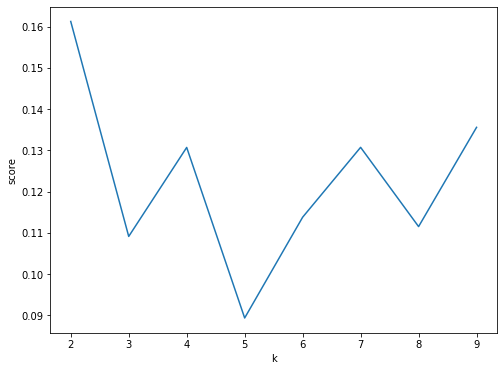

In [0]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('score')

In [0]:
k_means = KMeans(featuresCol='ftr_standardized', k=4)
model = k_means.fit(scaled_data)
predictions = model.transform(scaled_data)

result = predictions.select('BeneID', 'prediction')

In [0]:
# Shows the result.
result.groupBy('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 1767|
 3| 8089|
 2| 2797|
 0| 5147|
+----------+-----+

In [0]:
# Join other information with the prediction result-set
rfm_score = vecTrainDF.select("BeneID", "Trgt_Fraud", "Age", "InscClaimAmtReimbursed","IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","InscClaimAmtReimbursed","DeductibleAmtPaid")
combined_result = result.join(rfm_score, on='BeneID', how='inner')

In [0]:
display(combined_result)

BeneID,prediction,Trgt_Fraud,Age,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid
BENE100004,3,0,72,3000,14270,2136,3000,1068
BENE100006,3,1,63,17000,17000,1068,17000,1068
BENE100010,2,0,88,8000,13400,2136,8000,1068
BENE100024,3,1,77,19000,19840,1068,19000,1068
BENE100032,3,0,75,15000,39060,4272,15000,1068
BENE100052,3,0,92,19000,19400,1068,19000,1068
BENE100068,0,0,72,10000,10120,1068,10000,1068
BENE100075,1,0,102,6000,48650,4272,6000,1068
BENE100075,1,0,102,6000,48650,4272,6000,1068
BENE100075,1,0,102,24000,48650,4272,24000,1068


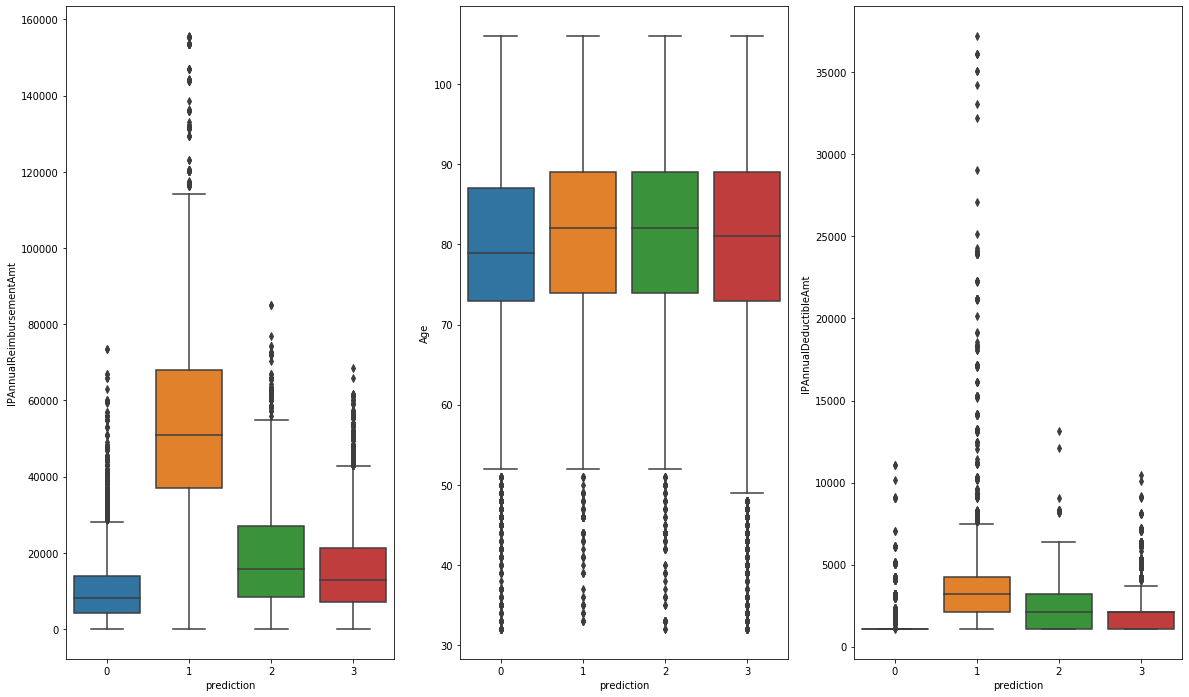

In [0]:
import seaborn as sns
analysis_df = combined_result.toPandas()

fig, ax = plt.subplots(1, 3, figsize=(20, 12))
sns.boxplot(x='prediction', y='IPAnnualReimbursementAmt', data=analysis_df, ax=ax[0])
sns.boxplot(x='prediction', y='Age', data=analysis_df, ax=ax[1])
sns.boxplot(x='prediction', y='IPAnnualDeductibleAmt', data=analysis_df, ax=ax[2])

In [0]:
(combined_result.groupBy("prediction").agg(sum("Trgt_Fraud").alias("sum_Fraud"),count("*").alias("count"),(sum("Trgt_Fraud")/count("*")).alias("pct_fraud")).show())

+----------+---------+-----+-------------------+
prediction|sum_Fraud|count| pct_fraud|
+----------+---------+-----+-------------------+
 1| 696| 3409|0.20416544441185097|
 3| 2099|12220|0.17176759410801964|
 2| 794| 4366|0.18185982592762254|
 0| 1150| 6607| 0.1740578174663236|
+----------+---------+-----+-------------------+